In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Dirichlet kernel

$$W(\omega)=\sum_{n=0}^{M-1} e^{-j \omega n}=e^{-j \omega(M-1) / 2} \frac{\sin (\omega M / 2)}{\sin (\omega / 2)},|\omega| \leq \pi$$

In [5]:
def Rect_win(M):
    def dirchlet(w):
        if w:
            return np.exp(-1j*w*(M-1)/2)*np.sin(w*M/2)/np.sin(w/2)
        else:
            return M
    return dirchlet

In [13]:
x = np.linspace(-np.pi, np.pi, 2000)
Wx = Rect_win(25)
y = np.array([Wx(i) for i in x])

Wx2 = Rect_win(51)
y2 = np.array([Wx2(i) for i in x])

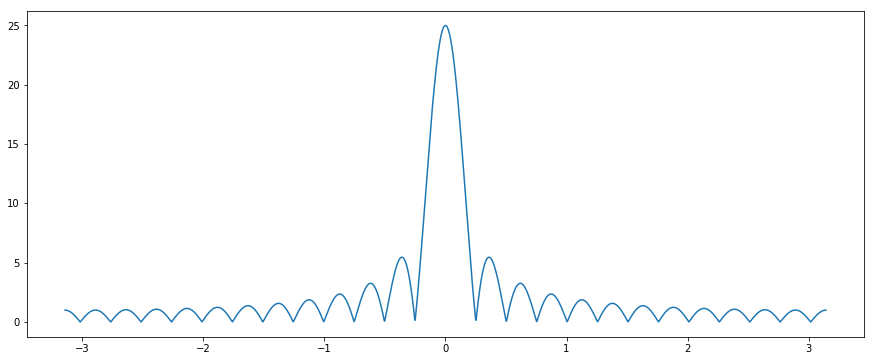

In [18]:
plt.figure(figsize = (15,6))
plt.plot(x, abs(y))
# plt.plot(x, abs(y2))

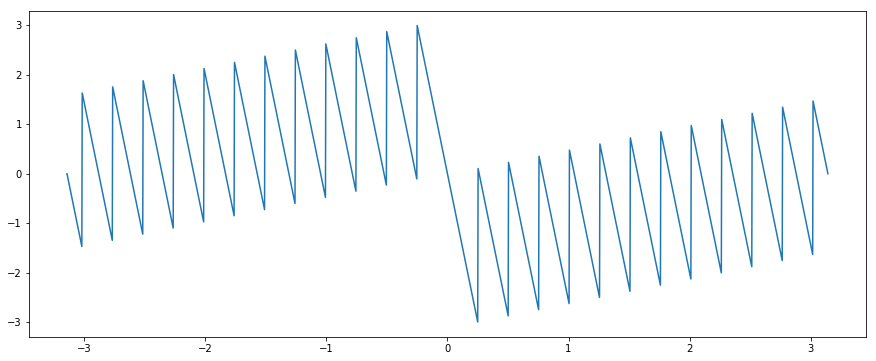

In [17]:
plt.figure(figsize = (15,6))
plt.plot(x, np.angle(y))
# plt.plot(x, np.angle(y2))

In [26]:
def ham_win(M):
    def w(x):
        return 0.54 - 0.46 * np.cos(2*np.pi*x/(M-1))
    return w

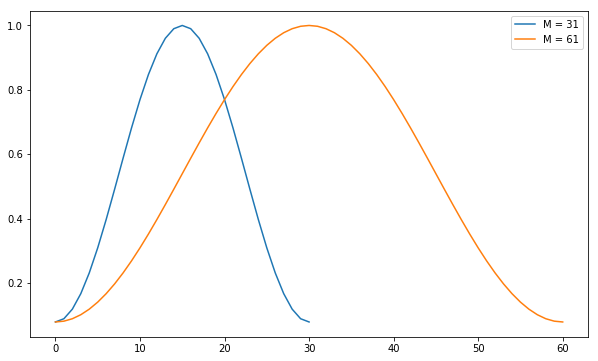

In [28]:
plt.figure(figsize = (10,6))

for M in [31, 61]:
    x = [i for i in range(M)]
    fx = ham_win(M)
    y = [abs(fx(i)) for i in x]
    plt.plot(x, y)

label = ["M = 31", "M = 61"]  
plt.legend(label)

# HW8

In [2]:
def h(n):
    if n==12:
        return 1/6
    else:
        return np.sin(n * np.pi/6)/(np.pi*(n-12))
    
hn = [h(i) for i in range(25)]

### DTFT

In [2]:
def Hw(hn, w):
    result = 0
    for i, h in enumerate(hn):
        result += h * np.exp(-1j*w*i)
    return result

**frequency response $\omega = 2\pi F$**, compute $\omega$ in range $[0, \pi]$ but plot in frequency Hz

In [8]:
x = np.linspace(0, np.pi,1000)
y1 = np.array([Hw(hn, i) for i in x])

Text(0,0.5,'magnitude (dB)')

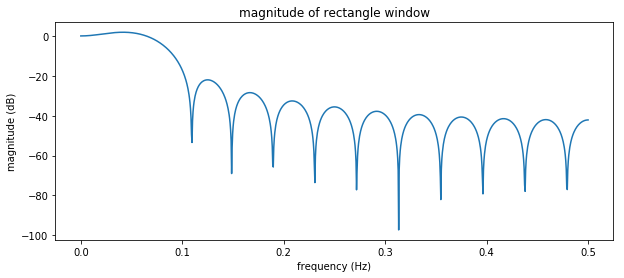

In [12]:
plt.figure(figsize = (10,4))
plt.plot(x/(2*np.pi), 20*np.log10(abs(y1/y1[0])))
plt.title("magnitude of rectangle window")
plt.xlabel('frequency (Hz)')
plt.ylabel('magnitude (dB)')

Text(0,0.5,'angle')

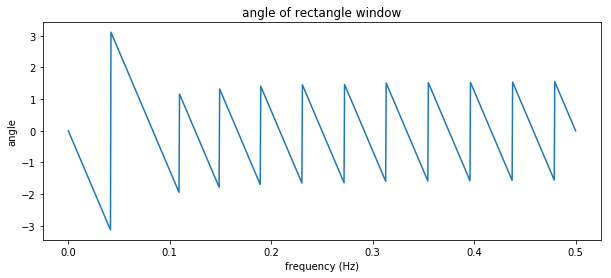

In [14]:
plt.figure(figsize = (10,4))
plt.plot(x/(2*np.pi), np.angle(y1))
plt.title("angle of rectangle window")
plt.xlabel('frequency (Hz)')
plt.ylabel('angle')

In [3]:
def ham_win(n, M):
    return 0.54 - 0.46 * np.cos(2*np.pi*n/(M-1))

In [16]:
ham = [hn[i] * ham_win(i, 25) for i in range(25)]
Hw2 = np.array([Hw(ham, i) for i in x])

Text(0,0.5,'magnitude (dB)')

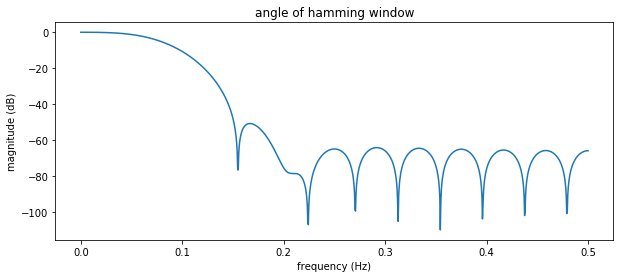

In [27]:
plt.figure(figsize = (10,4))
plt.plot(x/(2*np.pi), 20*np.log10(abs(Hw2/Hw2[0])))
plt.title("angle of hamming window")
plt.xlabel('frequency (Hz)')
plt.ylabel('magnitude (dB)')

Text(0,0.5,'angle')

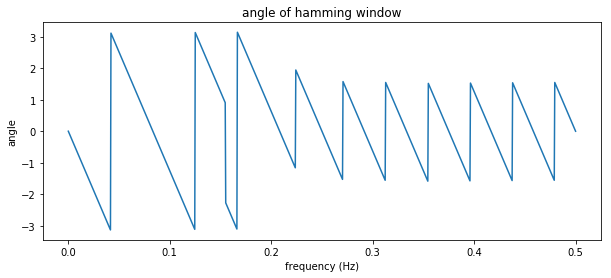

In [28]:
plt.figure(figsize = (10,4))
plt.plot(x/(2*np.pi), np.angle(Hw2))
plt.title("angle of hamming window")
plt.xlabel('frequency (Hz)')
plt.ylabel('angle')

## 21-tap discrete differentiator

The differentiator has for $h_{d}(n)=\frac{\cos \pi(n-10)}{(n-10)}$

In [39]:
h = np.zeros(21)
h[10] = 1
h[11] = -1

In [40]:
x2 = np.linspace(-np.pi, np.pi,1000)
ham3 = [h[i] * ham_win(i, 21) for i in range(21)]
Hw3 = np.array([Hw(ham3, i) for i in x2])

Text(0,0.5,'magnitude (dB)')

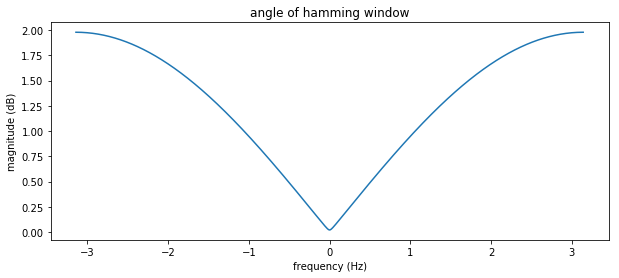

In [41]:
plt.figure(figsize = (10,4))
plt.plot(x2, abs(Hw3))
plt.title("angle of hamming window")
plt.xlabel('frequency (Hz)')
plt.ylabel('magnitude (dB)')

Text(0,0.5,'angle')

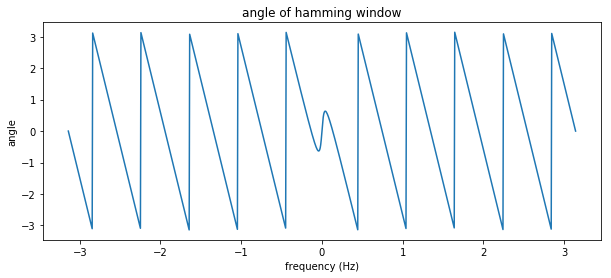

In [42]:
plt.figure(figsize = (10,4))
plt.plot(x2, np.angle(Hw3))
plt.title("angle of hamming window")
plt.xlabel('frequency (Hz)')
plt.ylabel('angle')

Text(0,0.5,'angle')

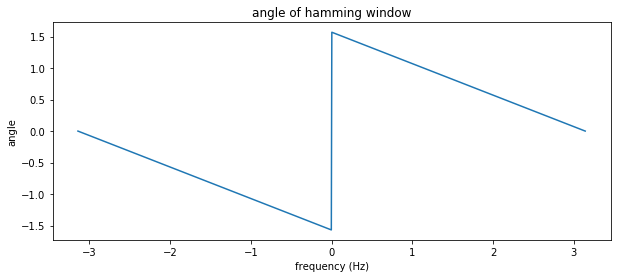

In [51]:
# actual angle:
w = np.linspace(-np.pi, np.pi,1000)
Hw = np.array([1-np.exp(-1j * i) for i in w])

plt.figure(figsize = (10,4))
plt.plot(w, np.angle(Hw))
plt.title("angle of hamming window")
plt.xlabel('frequency (Hz)')
plt.ylabel('angle')